# VIDEO GAME SALES

**INFO** - This project is aimed to work on the information available in the $video-games$ dataset and plot the corresponding infromation on the graph using `matplotlip` and `seaborn` library. The dataset in this project contains the information about video games whose sales were grater than 100,000 copies. This dataset is obtained from $kaggle$.

In [1]:
!pip install matplotlib seaborn --upgrade --quiet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In this step, I have loaded the `vgsales.csv` file into the dataframe using the `pandas` library and checked for the shape and size of the newly formed dataframe. The rows in this csv file are around 11000 but I have loaded the first 150 rows into the dataframe.

In [5]:
video_games_df = pd.read_csv(r"C:\Users\HP\Documents\JupyterNotebook\Video Game Sales\vgsales.csv")

In [6]:
video_games_df = video_games_df.head(150)

In [8]:
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03
146,147,The Last of Us,PS3,2013.0,Action,Sony Computer Entertainment Europe,2.41,2.28,0.28,1.01,5.99
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95
148,149,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92


1. `NA_Sales` = Sales in North America
2. `EU_Sales` = Sales in Europe
3. `JP_Sales` = Sales in Japan
4. `Other_Sales` = Sales in rest of the world
5. `Global_Sales` = Total Sales of the game

In [7]:
video_games_df.shape

(150, 11)

In [159]:
video_games_df['Year'].max(), video_games_df['Year'].min()

(2015.0, 1982.0)

In [160]:
range = 2015 - 1982
range

33

# Exploratory Analysis and Visualization

This part contains various data operations like `sum` and `count` and plotting and comparing the data using `histograms`, `bargraph` etc.

In [152]:
import matplotlib
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

 ### ----- Plotting the global sales of different Genre of video games.

In [130]:
unique_df = video_games_df.groupby(['Genre'])['Global_Sales'].sum()

In [131]:
unique_df = pd.DataFrame(unique_df)
unique_df

,Global_Sales
Genre,
Action,234.06
Adventure,11.18
Fighting,41.02
Misc,146.82
Platform,290.72
Puzzle,53.37
Racing,175.94
Role-Playing,256.24
Shooter,317.54


In [132]:
unique_df = unique_df.reset_index()

In [133]:
unique_df

,Genre,Global_Sales
0,Action,234.06
1,Adventure,11.18
2,Fighting,41.02
3,Misc,146.82
4,Platform,290.72
5,Puzzle,53.37
6,Racing,175.94
7,Role-Playing,256.24
8,Shooter,317.54
9,Simulation,54.23


Text(0, 0.5, '_____Global Sales ( Millions )_____')

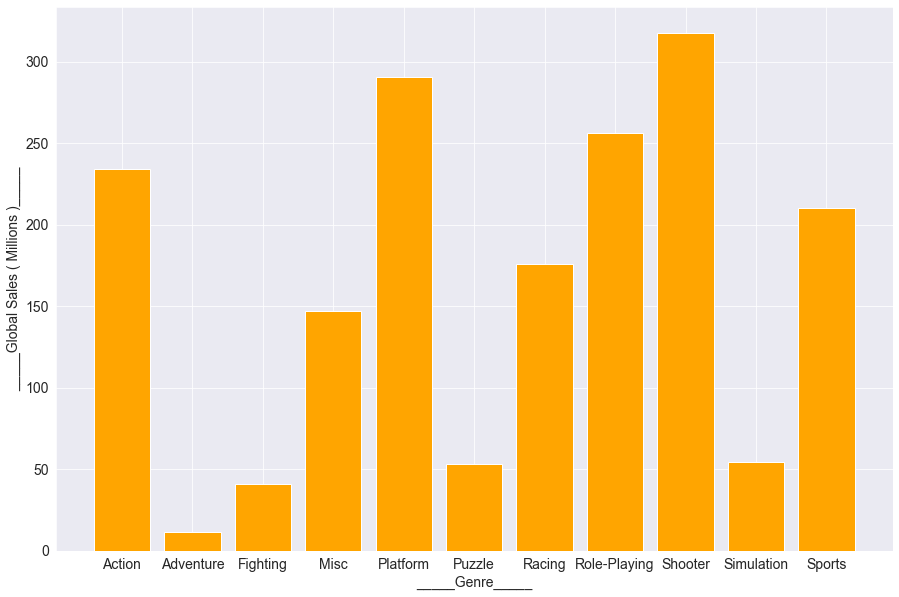

In [210]:
plt.bar(unique_df['Genre'], unique_df['Global_Sales'],color=['orange'])
plt.xlabel('_____Genre_____')
plt.ylabel('_____Global Sales ( Millions )_____')

### ----- Finding about which publisher made the most sales globally and plotting it.

In [295]:
publisher_df = video_games_df.groupby(['Publisher'])['Global_Sales'].sum()

In [296]:
publisher_df = pd.DataFrame(publisher_df).reset_index()
publisher_df 

,Publisher,Global_Sales
0,505 Games,6.81
1,Activision,186.18
2,Atari,7.81
3,Bethesda Softworks,22.36
4,Capcom,6.30
5,Electronic Arts,88.19
6,GT Interactive,6.27
7,Konami Digital Entertainment,18.11
8,Microsoft Game Studios,109.43
9,Nintendo,993.29


In [297]:
publisher_df = publisher_df.sort_values(['Global_Sales'], ascending=False)
publisher_df

,Publisher,Global_Sales
9,Nintendo,993.29
1,Activision,186.18
15,Take-Two Interactive,142.07
11,Sony Computer Entertainment,130.19
8,Microsoft Game Studios,109.43
5,Electronic Arts,88.19
16,Ubisoft,40.46
3,Bethesda Softworks,22.36
7,Konami Digital Entertainment,18.11
10,Sega,14.09


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

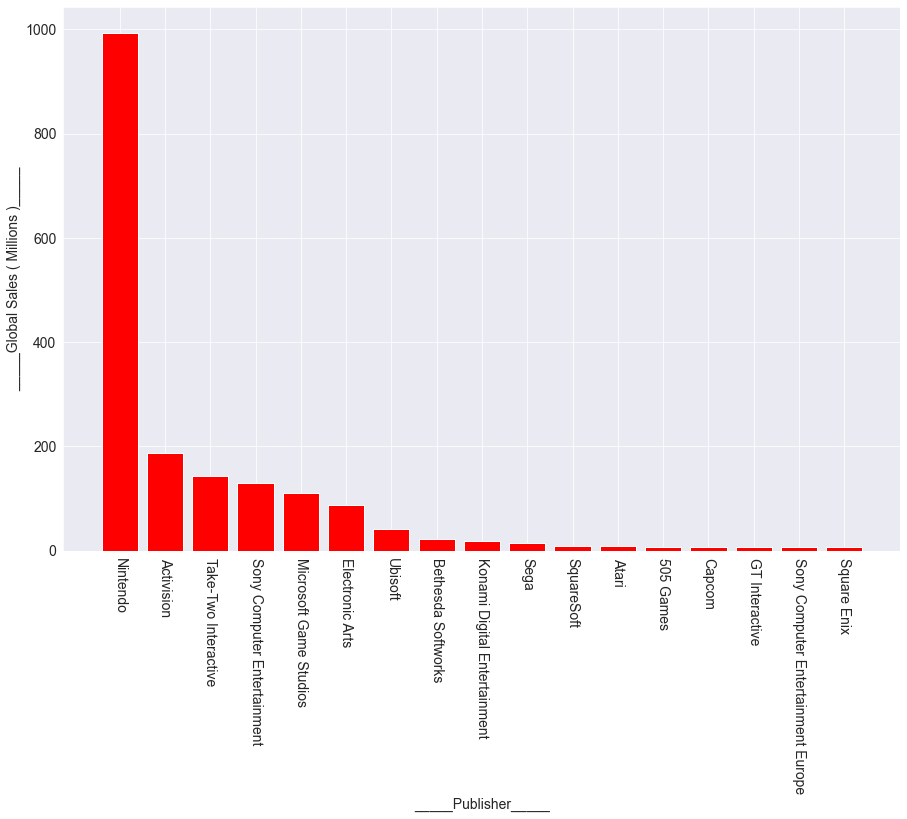

In [298]:
plt.bar(publisher_df['Publisher'], publisher_df['Global_Sales'], color=['red'])
plt.xlabel('_____Publisher_____')
plt.ylabel('_____Global Sales ( Millions )_____')
plt.xticks(rotation = -90)

### ----- Plotting a scatter graph showing the games published in a particular genre in a specific year.

[Text(0.5, 0, '_____Genre_____'), Text(0, 0.5, '_____Year_____')]

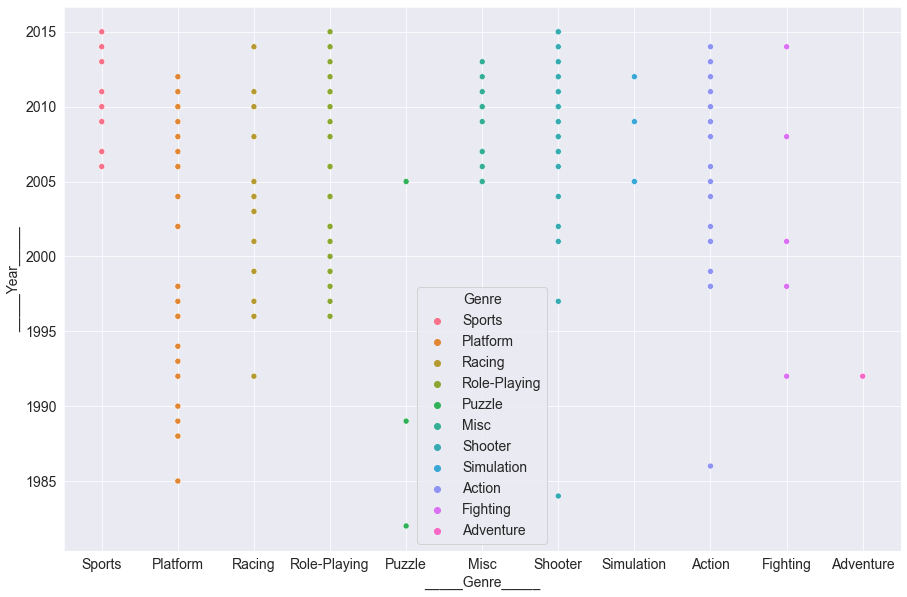

In [170]:
sns.scatterplot(x=video_games_df['Genre'], y=video_games_df['Year'], hue=video_games_df['Genre']).set(xlabel='_____Genre_____', ylabel='_____Year_____')

### ----- Plotting the number of games published in each platform

In [188]:
platform_df = pd.DataFrame(video_games_df.groupby(['Platform'])['Name'].count())

In [189]:
platform_df.rename(columns = {'Name' : 'No_of_games'}, inplace=True)

In [190]:
platform_df

,No_of_games
Platform,
2600,1
3DS,7
DS,15
GB,7
GBA,3
GC,3
GEN,1
N64,4
NES,5


<AxesSubplot:ylabel='Platform'>

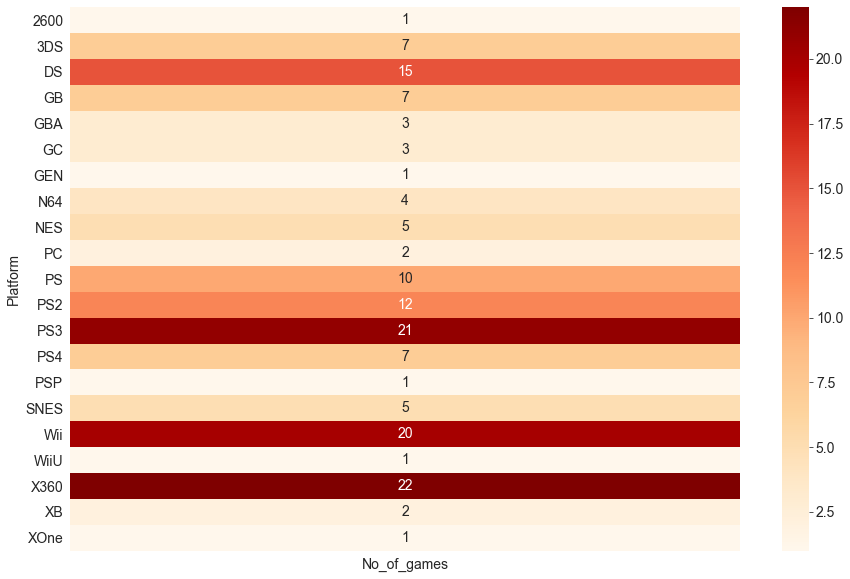

In [196]:
sns.heatmap(platform_df, annot=True, cmap='OrRd')

### ----- Plotting a histogram showing the number of games published in a particular range.

In [197]:
no_of_games_by_publisher_df = pd.DataFrame(video_games_df.groupby(['Publisher'])['Name'].count())

In [199]:
no_of_games_by_publisher_df.rename(columns = {'Name' : 'No_of_games'}, inplace=True)

In [200]:
no_of_games_by_publisher_df

,No_of_games
Publisher,
505 Games,1
Activision,17
Atari,1
Bethesda Softworks,3
Capcom,1
Electronic Arts,12
GT Interactive,1
Konami Digital Entertainment,3
Microsoft Game Studios,12


Text(0, 0.5, 'Games Published in Range')

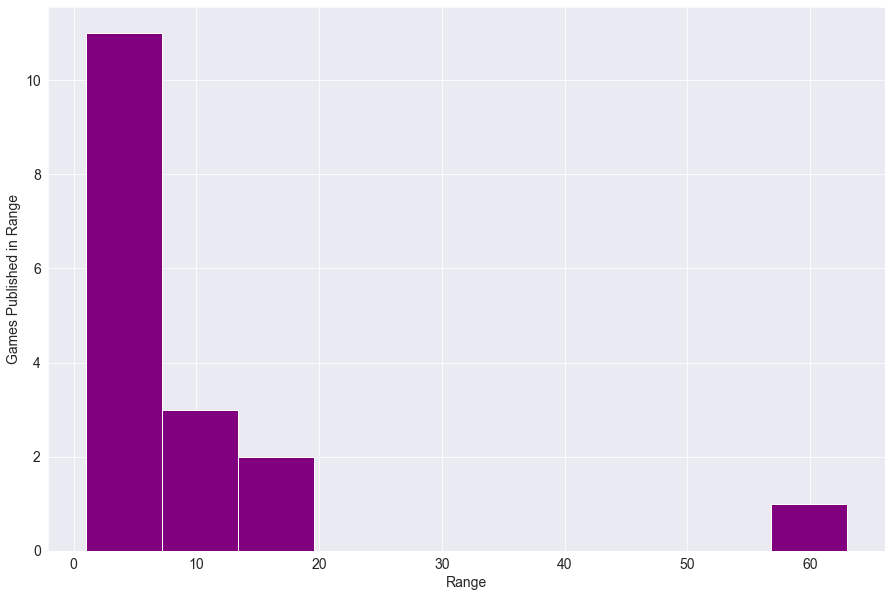

In [215]:
plt.hist(no_of_games_by_publisher_df, color=['purple'])
plt.xlabel('Range')
plt.ylabel('Games Published in Range')

# Answering and Asking Questions

This part will contain some questions about the dataset and their respective answers

In [224]:
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03
146,147,The Last of Us,PS3,2013.0,Action,Sony Computer Entertainment Europe,2.41,2.28,0.28,1.01,5.99
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95
148,149,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92


### Q1: Find 10 least performing game in North America according to the given data.

In [225]:
north_america_df = video_games_df.sort_values(['NA_Sales'])

In [226]:
north_america_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.00,0.00,6.28
149,150,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.84
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
121,122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
122,123,Big Brain Academy,DS,2005.0,Misc,Nintendo,1.67,2.78,1.60,0.62,6.67
78,79,Wii Party,Wii,2010.0,Misc,Nintendo,1.79,3.53,2.49,0.68,8.49


### Q2: Find 10 most performing platforms in Global Sales according to the given data.

In [245]:
most_platform_df = pd.DataFrame(video_games_df.groupby(['Platform'])['Global_Sales'].sum())

In [250]:
most_platform_df = most_platform_df.sort_values(['Global_Sales'] , ascending=False)
most_platform_df.head(10)

,Global_Sales
Platform,
Wii,365.81
X360,227.97
DS,219.68
PS3,190.18
GB,135.08
PS2,124.08
NES,99.80
PS,79.01
3DS,75.04


### Q3: Find the games which performed the most in Japan but least in Europe.

In [271]:
df1 = pd.DataFrame(video_games_df.sort_values(['JP_Sales'], ascending=False)).head(20)
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [272]:
df2 = pd.DataFrame(video_games_df.sort_values(['EU_Sales'])).head(20)
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
149,150,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.84
136,137,Street Fighter II: The World Warrior,SNES,1992.0,Fighting,Capcom,2.47,0.83,2.87,0.12,6.30
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
107,108,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46


In [270]:
df1.merge(df2, how='inner')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,150,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.84
1,77,Super Mario Kart,SNES,1992.0,Racing,Nintendo,3.54,1.24,3.81,0.18,8.76


### Q4: Find the total sales happened a in particular year and sort them in decreasing order.

In [312]:
years_sold_df = pd.DataFrame(video_games_df.groupby('Year')['Global_Sales'].sum())

In [313]:
years_sold_df = years_sold_df.sort_values(['Global_Sales'], ascending=False)

In [314]:
years_sold_df

,Global_Sales
Year,
2006.0,179.50
2009.0,154.03
2010.0,143.44
2011.0,111.21
2005.0,110.36
2008.0,104.37
2013.0,94.02
2007.0,87.92
2012.0,86.41


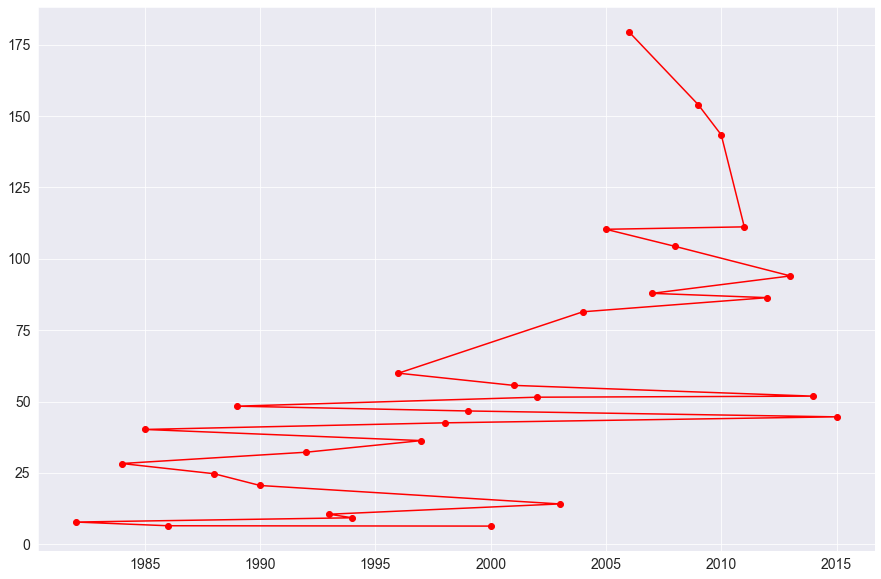

In [315]:
plt.plot(years_sold_df, 'o-r')

### Q5: Find the ratio of sum of sales in North America, Europe and Japan to Global_Sales and put them into the main datframe by making a new column.

In [293]:
video_games_df['Ratio'] = (video_games_df['Global_Sales'] - video_games_df['Other_Sales']) / video_games_df['Global_Sales']
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ratio
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.897752
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.980865
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.907594
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.910303
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.968122
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03,0.960199
146,147,The Last of Us,PS3,2013.0,Action,Sony Computer Entertainment Europe,2.41,2.28,0.28,1.01,5.99,0.831386
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95,0.707563
148,149,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92,0.847973


# Inferences and Conclusion

From the analysis, following conclusions can be drawn:-
   1. Around the period $1982 - 2015$, people were most interested in **Shooter** genre and least in **Adventure** genre.
   2. During this period, **Nintendo** made the most sales and **Square Enix** made the least sales.
   3. **Dragon Quest IX: Sentinels of the Starry Skies** sold the least while **Wii Sports** sold the most.
   4. Most games were sold in the year **2006** and least in **2000**.
   5. Most games were published on **Xbox 360** platform.